In [1]:
'''
ID         :190031094
Name       :Naveen Mulaga
Skill_#5   :simple decision Tree Model Using Information  Gain as Attribute Selection Measure

'''

'\nID         :190031094\nName       :Naveen Mulaga\nSkill_#1   :Data Visualization and Exploring\n\n'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [3]:
df1=pd.read_csv('blood-format (1).csv')
df2=pd.read_csv('blood-test.csv')
df3=pd.read_csv('blood-train.csv')

In [4]:
df1

,Unnamed: 0,Made Donation in March 2007
0,659,0.5
1,276,0.5
2,263,0.5
3,303,0.5
4,83,0.5
...,...,...
195,103,0.5
196,224,0.5
197,454,0.5
198,585,0.5


In [5]:
df2

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,659,2,12,3000,52
1,276,21,7,1750,38
2,263,4,1,250,4
3,303,11,11,2750,38
4,83,4,12,3000,34
...,...,...,...,...,...
195,103,16,1,250,16
196,224,21,2,500,23
197,454,23,8,2000,46
198,585,23,2,500,28


In [6]:
df3

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0
...,...,...,...,...,...,...
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0


In [7]:
df3.rename(columns={'Unnamed: 0':'Index'},inplace=True)
df3.rename(columns={'Months since Last Donation':'Months_since_Last_Donation'},inplace=True)
df3.rename(columns={'Number of Donations':'Number_of_Donations'},inplace=True)
df3.rename(columns={'Total Volume Donated (c.c.)':'Total_Volume_Donated'},inplace=True)
df3.rename(columns={'Months since First Donation':'Months_since_First_Donation'},inplace=True)
df3.rename(columns={'Made Donation in March 2007':'Made_Donation_in_March_2007'},inplace=True)
df3

,Index,Months_since_Last_Donation,Number_of_Donations,Total_Volume_Donated,Months_since_First_Donation,Made_Donation_in_March_2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0
...,...,...,...,...,...,...
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0


In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Index                        576 non-null    int64
 1   Months_since_Last_Donation   576 non-null    int64
 2   Number_of_Donations          576 non-null    int64
 3   Total_Volume_Donated         576 non-null    int64
 4   Months_since_First_Donation  576 non-null    int64
 5   Made_Donation_in_March_2007  576 non-null    int64
dtypes: int64(6)
memory usage: 27.1 KB


In [9]:
df3.describe()

,Index,Months_since_Last_Donation,Number_of_Donations,Total_Volume_Donated,Months_since_First_Donation,Made_Donation_in_March_2007
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


In [10]:
df3.isnull().sum()

Index                          0
Months_since_Last_Donation     0
Number_of_Donations            0
Total_Volume_Donated           0
Months_since_First_Donation    0
Made_Donation_in_March_2007    0
dtype: int64

In [11]:
max(df3.corr())

'Total_Volume_Donated'

In [12]:
#Splitting of the data
X = df3[['Months_since_Last_Donation','Number_of_Donations','Total_Volume_Donated','Months_since_First_Donation']]
Y = df3.Made_Donation_in_March_2007

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=4)

In [13]:
#decision tree with entropy
clf_entropy=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=3,min_samples_leaf=5)
model=clf_entropy.fit(X_train,Y_train)

In [14]:
y_predict=clf_entropy.predict(X_test)
y_predict

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [15]:
from sklearn import metrics
#confusion matrix
c_matrix=metrics.confusion_matrix(Y_test,y_predict)
c_matrix

array([[102,  11],
       [ 22,   9]], dtype=int64)

In [16]:
# accuracy calculation
acc = metrics.accuracy_score(Y_test,y_predict)
acc_percentage = 100*acc
acc_percentage

77.08333333333334

In [17]:
from sklearn.tree import plot_tree
from sklearn import tree

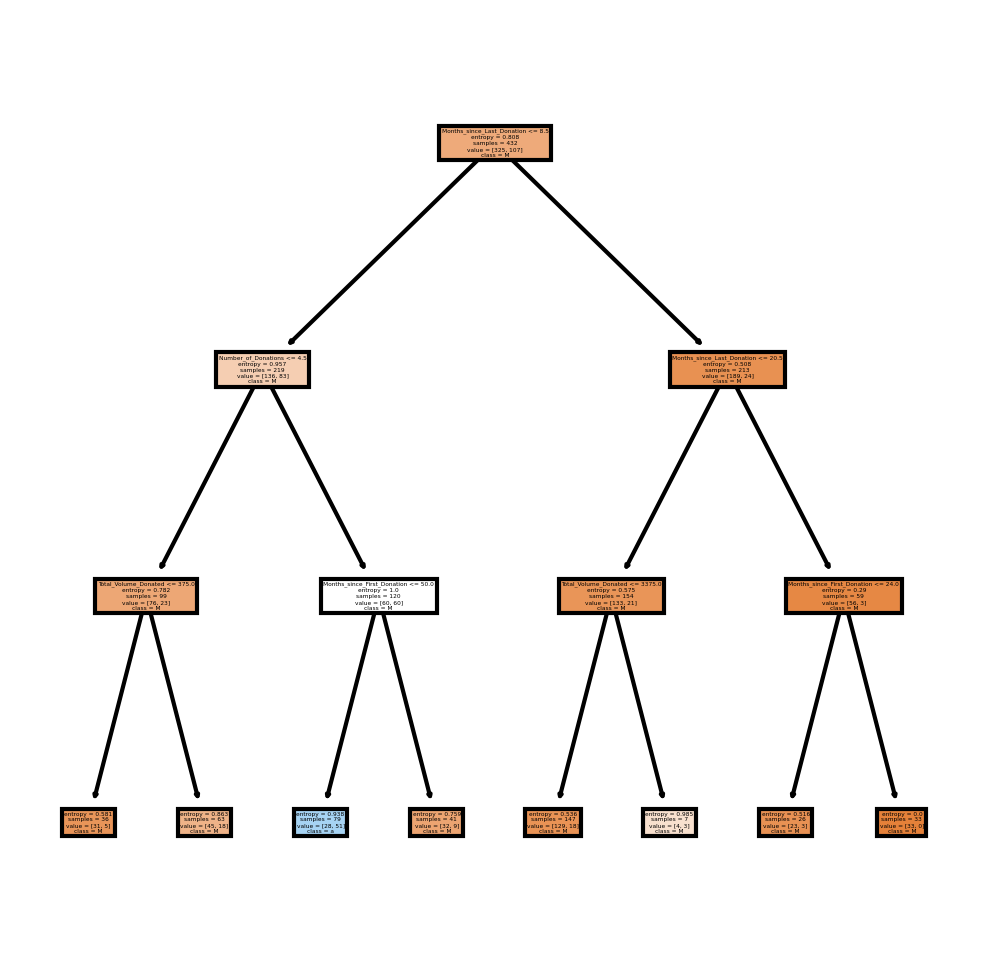

In [18]:
fns = ['Months_since_Last_Donation','Number_of_Donations','Total_Volume_Donated','Months_since_First_Donation','Made_Donation_in_March_2007']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf_entropy,feature_names = fns, class_names= 'Made_Donation_in_March_2007',filled = True);

fig.savefig('image.png')